# Dual numbers (дуальные числа)

Числа из этого множества имеют вид $z = a + b\varepsilon$

Назовём $a$ вещественной частью числа, а $b$ мнимой 

Для $\varepsilon$ выполняется следующее равенство: $\varepsilon^2=0$. Отсюда получаем правила обращения с этими числами и, в частности, два полезных свойтва:
$$
a+b\varepsilon=a\cdot\mathrm{exp}(\frac{b}{a}\varepsilon)=r\mathrm{e}^{\varphi\varepsilon}   \qquad   f(a+b\varepsilon) = f(a) + bf'(a)\varepsilon
$$
С помощью последнего равенства можно продолжить дифференцируемые функции на множество дуальных чисел и легко находить значение производных этих функций


Ниже написана программа, позволяющая работать с дуальными числами. Под ней можно найти несколько комментариев по её использованию

In [1]:
import math


class Dual_number:
    def __init__(self, re=0., im=0.):
        self.re = re
        self.im = im
        
    # Перевод в int при self.im = 0
    def __int__(self):
        if self.im == 0:
            return int(self.re)
        raise ValueError("Нельзя преобразовать в int")
 
    # Перевод в float при self.im = 0
    def __float__(self):
        if self.im == 0:
            return float(self.re)
        raise ValueError("Нельзя преобразовать в float")
        
    # Сопряженное число
    def conj(self):
        return Dual_number(self.re, -self.im)
    
    # Аналог угла числа
    def ang(self):
        return self.im / self.re
    
    # Модуль числа
    def __abs__(self):
        return self.re

    # Вывод числа
    def __str__(self):
        return f'{self.re}{self.im:+}ε'
    
    def __pos__(self):
        return Dual_number(self)
    
    def __neg__(self):
        return Dual_number(-self.re, -self.im)

    # Сложение чисел
    def __add__(self, other):
        if isinstance(other, Dual_number):
            return Dual_number(self.re + other.re, self.im + other.im)
        elif isinstance(other, int) or isinstance(other, float):
            return Dual_number(self.re + other, self.im)
        raise TypeError("Неправильный тип переменной")
    __radd__ = __add__
    __iadd__ = __add__
    
    # Вычитание чисел
    def __sub__(self, other):
        if isinstance(other, Dual_number):
            return Dual_number(self.re - other.re, self.im - other.im)
        elif isinstance(other, int) or isinstance(other, float):
            return Dual_number(self.re - other, self.im)
        raise TypeError("Неправильный тип переменной")
        
    def __rsub__(self, other):
        if isinstance(other, Dual_number):
            return Dual_number(self.re - other.re, self.im - other.im)
        elif isinstance(other, int) or isinstance(other, float):
            return Dual_number(other - self.re, -self.im)
        raise TypeError("Неправильный тип переменной")
    __isub__ = __sub__
    
    # Умножение чисел
    def __mul__(self, other):
        if isinstance(other, Dual_number):
            return Dual_number(self.re * other.re,
                      self.re * other.im + self.im * other.re)
        elif isinstance(other, int) or isinstance(other, float):
            return Dual_number(self.re * other, self.im * other)
        raise TypeError("Неправильный множитель")
    __rmul__ = __mul__
    __imul__ = __mul__
    
    # Деление чисел
    def __truediv__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Dual_number(self.re / other, self.im / other)
        elif isinstance(other, Dual_number):
            if other.re != 0:
                return Dual_number(self.re / other.re, (self.im * other.re - self.re * other.im) / other.re**2)
            elif self.re == 0:
                # Для определенности в этом случае мнимая часть равна 0
                return Dual_number(self.im / other.im, 0)
            else:
                raise ValueError("Нет решения")
        raise TypeError("Неправильный делитель")
        
    def __rtruediv__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            if self.re != 0:
                return Dual_number(other / self.re, -other * self.im / self.re**2)
            elif other == 0:
                # Аналогично прошлому пункту, мнимая часть равна 0
                return Dual_number(0, 0)
            else:
                raise ValueError("Нет решения")
        raise TypeError("Неправильное делимое")
    __itruediv__ = __truediv__

    # Возведение в степень
    def __pow__(self, other):
        if isinstance(other, int) or isinstance(other, float):
            return Dual_number(self.re**other, self.re**(other - 1) * other * self.im)
        elif isinstance(other, Dual_number):
            return Dual_number(self.re**other.re,
                      self.re**other.re * other.im * math.log(self.re) + self.re**(other.re - 1) * other.re * self.im)
        raise TypeError("Неправильная степень")

    def __rpow__(self, other):
        if isinstance(other, Dual_number):
            return other**self
        elif isinstance(other, int) or isinstance(other, float):
            return Dual_number(other**self.re, other**self.re * self.im * math.log(other))
        raise TypeError("Неправильное основание показательной функции")
    __ipow__ = __pow__

    # Равенство чисел
    def __eq__(self, other):
        if isinstance(other, Dual_number):
            if self.re == other.re and self.im == other.im:
                return True
            else:
                return False
        elif isinstance(other, int) or isinstance(other, float):
            if self.im == 0 and self.re == other:
                return True
            else:
                return False
        raise TypeError("Невозможно сравнить объекты")

    # Неравенство чисел
    def __ne__(self, other):
        return not(self == other)


eps = Dual_number(0, 1)


def log(x, base=math.e):
    # Возвращает логарифм от x
    if (isinstance(base, int) or isinstance(base, float)) and (isinstance(x, int) or isinstance(x, float)):
        return math.log(x, base)
    elif (isinstance(base, int) or isinstance(base, float)) and isinstance(x, Dual_number):
        return (log(x.re) + x.im / x.re * eps) / log(base)
    elif isinstance(x, Dual_number) and isinstance(base, Dual_number):
        return log(x) / log(base)
    raise TypeError("Неправильные аргументы логарифма")


def exp(x):
    # Возвращает экспоненту от x
    if isinstance(x, int) or isinstance(x, float):
        return math.exp(x)
    elif isinstance(x, Dual_number):
        return math.e**x
    raise TypeError("Неправильный аргумент экспоненты")


def sin(x):
    # Возвращает синус от x
    if isinstance(x, int) or isinstance(x, float):
        return math.sin(x)
    elif isinstance(x, Dual_number):
        return math.sin(x.re) + x.im * math.cos(x.re) * eps
    raise TypeError("Неправильный аргумент синуса")


def cos(x):
    # Возвращает косинус от x
    if isinstance(x, int) or isinstance(x, float):
        return math.cos(x)
    elif isinstance(x, Dual_number):
        return math.cos(x.re) - x.im * math.sin(x.re) * eps
    raise TypeError("Неправильный аргумент косинуса")


def tan(x):
    # Возвращает тангенс от x
    if isinstance(x, int) or isinstance(x, float):
        return math.tan(x)
    elif isinstance(x, Dual_number):
        return math.tan(x.re) + (math.tan(x.re)**2 + 1) * x.im * eps
    raise TypeError("Неправильный аргумент тангенса")


def ctn(x):
    # Возвращает котангенс от x
    if isinstance(x, int) or isinstance(x, float):
        return math.tan(math.pi / 2 - x)
    elif isinstance(x, Dual_number):
        return math.tan(math.pi / 2 - x.re) - x.im * eps / math.sin(x.re)**2
    raise TypeError("Неправильный аргумент котангенса")


def asin(x):
    # Возвращает арксинус от x
    if isinstance(x, int) or isinstance(x, float):
        return math.asin(x)
    elif isinstance(x, Dual_number):
        return math.asin(x.re) + x.im * eps / math.sqrt(1 - x.re**2)
    raise TypeError("Неправильный аргумент арксинуса")


def acos(x):
    # Возвращает арккосинус от x
    if isinstance(x, int) or isinstance(x, float):
        return math.acos(x)
    elif isinstance(x, Dual_number):
        return math.acos(x.re) - x.im * eps / math.sqrt(1 - x.re ** 2)
    raise TypeError("Неправильный аргумент арккосинуса")


def atan(x):
    # Возвращает арктангенс от x
    if isinstance(x, int) or isinstance(x, float):
        return math.atan(x)
    elif isinstance(x, Dual_number):
        return math.atan(x.re) + x.im * eps / (1 + x.re**2)
    raise TypeError("Неправильный аргумент арктангенса")


def actn(x):
    # Возвращает арккотангенс от x
    if isinstance(x, int) or isinstance(x, float):
        return math.pi / 2 - math.atan(x)
    elif isinstance(x, Dual_number):
        return math.pi / 2 - math.atan(x.re) - x.im * eps / (1 + x.re**2)
    raise TypeError("Неправильный аргумент арккотангенса")


def sinh(x):
    # Возвращает гиперболический синус от x
    if isinstance(x, int) or isinstance(x, float):
        return math.sinh(x)
    elif isinstance(x, Dual_number):
        return math.sinh(x.re) + math.cosh(x.re) * x.im * eps
    raise TypeError("Неправильный аргумент гиперболического синуса")


def cosh(x):
    # Возвращает гиперболический косинус от x
    if isinstance(x, int) or isinstance(x, float):
        return math.cosh(x)
    elif isinstance(x, Dual_number):
        return math.cosh(x.re) + math.sinh(x.re) * x.im * eps
    raise TypeError("Неправильный аргумент гиперболического косинуса")


def tanh(x):
    # Возвращает аргумент гиперболического тангенса от x
    if isinstance(x, int) or isinstance(x, float):
        return math.tanh(x)
    elif isinstance(x, Dual_number):
        return math.tanh(x.re) + x.im * eps / math.cosh(x.re)**2
    raise TypeError("Неправильный аргумент гиперболического тангенса")


def ctnh(x):
    # Возвращает аргумент гиперболического котангенса от x
    if isinstance(x, int) or isinstance(x, float) or isinstance(x, Dual_number):
        return 1 / tanh(x)
    raise TypeError("Неправильный аргумент гиперболического котангенса")


def asinh(x):
    # Возвращает гиперболический арксинус от x
    if isinstance(x, int) or isinstance(x, float):
        return math.asinh(x)
    elif isinstance(x, Dual_number):
        return math.asinh(x.re) + x.im * eps / math.sqrt(x.re**2 + 1)
    raise TypeError("Неправильный аргумент гиперболического арксинуса")


def acosh(x):
    # Возвращает гиперболический арккосинус от x
    if isinstance(x, int) or isinstance(x, float):
        return math.acosh(x)
    elif isinstance(x, Dual_number):
        return math.acosh(x.re) + x.im * eps / math.sqrt(x.re ** 2 - 1)
    raise TypeError("Неправильный аргумент гиперболического арксинуса")


def atanh(x):
    # Возвращает гиперболический арктангенс от x
    if isinstance(x, int) or isinstance(x, float):
        return math.atanh(x)
    elif isinstance(x, Dual_number):
        return math.atanh(x.re) + x.im * eps / (1 - x.re**2)
    raise TypeError("Неправильный аргумент гиперболического арктангенса")


def deriv(func, x):
    # Возвращает значение производной функции func в вещественной точке x
    if isinstance(x, int) or isinstance(x, float) or isinstance(x, Dual_number) and x.im == 0:
        return func(x + eps).im
    raise TypeError("Неправильный тип аргумента функции")


Для создания числа из множества дуальных чисел нужно воспользоваться командой `Dual_number`, на вход которой подаются вещественная и мнимая части числа. Также для этого можно использовать встроенную мнимую единицу, вызываемую через `eps`. А с помощью команд `re` и `im` можно получить мнимую и вещественную части чисел

In [2]:
z1 = Dual_number(5, 4)
print(z1)
z2 = 10 - 7 * eps
print(z2)
print(z2.re, z2.im)

5+4ε
10-7ε
10 -7


Для получения модуля и угла дуального числа из экспоненциальной записи используются функция `abs` и метод `ang`. Метод `conj` позволяет получить сопряжённое число к $z=a+b\varepsilon$, которое задаётся по формуле $\tilde{z}=a-b\varepsilon$

In [3]:
print(abs(z1))
print(z1.ang())
print(z1.conj())

5
0.8
5-4ε


Дуальные числа поддерживают все арифметические операции и могут работать с числами типов int и float

Также можно использовать все команды вида `+=`

In [4]:
print(z1 + z2)
print(z1 - z2)
print(z1 * z2)
print(z1 / z2)
print(z1**z2) 

15-3ε
-5+11ε
50+5ε
0.5+0.75ε
9765625-31895169.795299828ε


Для взятия производной используется функция `deriv`, которая принимает саму функцию и вещественную точку, в которой нужно посчитать производную. В качестве примера посчитаем производную функции $\sin(\ln x)$ в точке $x=1$

Так как производная этой функции равна $\cos(\ln x)/x$, то программа должна вывести 1

In [5]:
print(deriv(lambda x: sin(log(x)), 1))

1.0


Также для нахождения значения производной можно воспользоваться её прямым вычислением через преобразованную формулу из самого начала файла:
$$
f'(a) = \frac{f(a+\varepsilon) - f(a)}{\varepsilon}
$$

In [6]:
print((sin(log(1 + eps)) - sin(log(1))) / eps)

1.0+0ε


В качестве ещё одного примера рассмотрим функцию $f(x) = x^4\ln(x)$. Сравним значение производной, посчитанной с помощью функции `deriv` и с помощью формулы выше, с её действительным значением $x^3(1 + 4\ln x)$ на отрезке $[1, 10]$

<IPython.core.display.Javascript object>


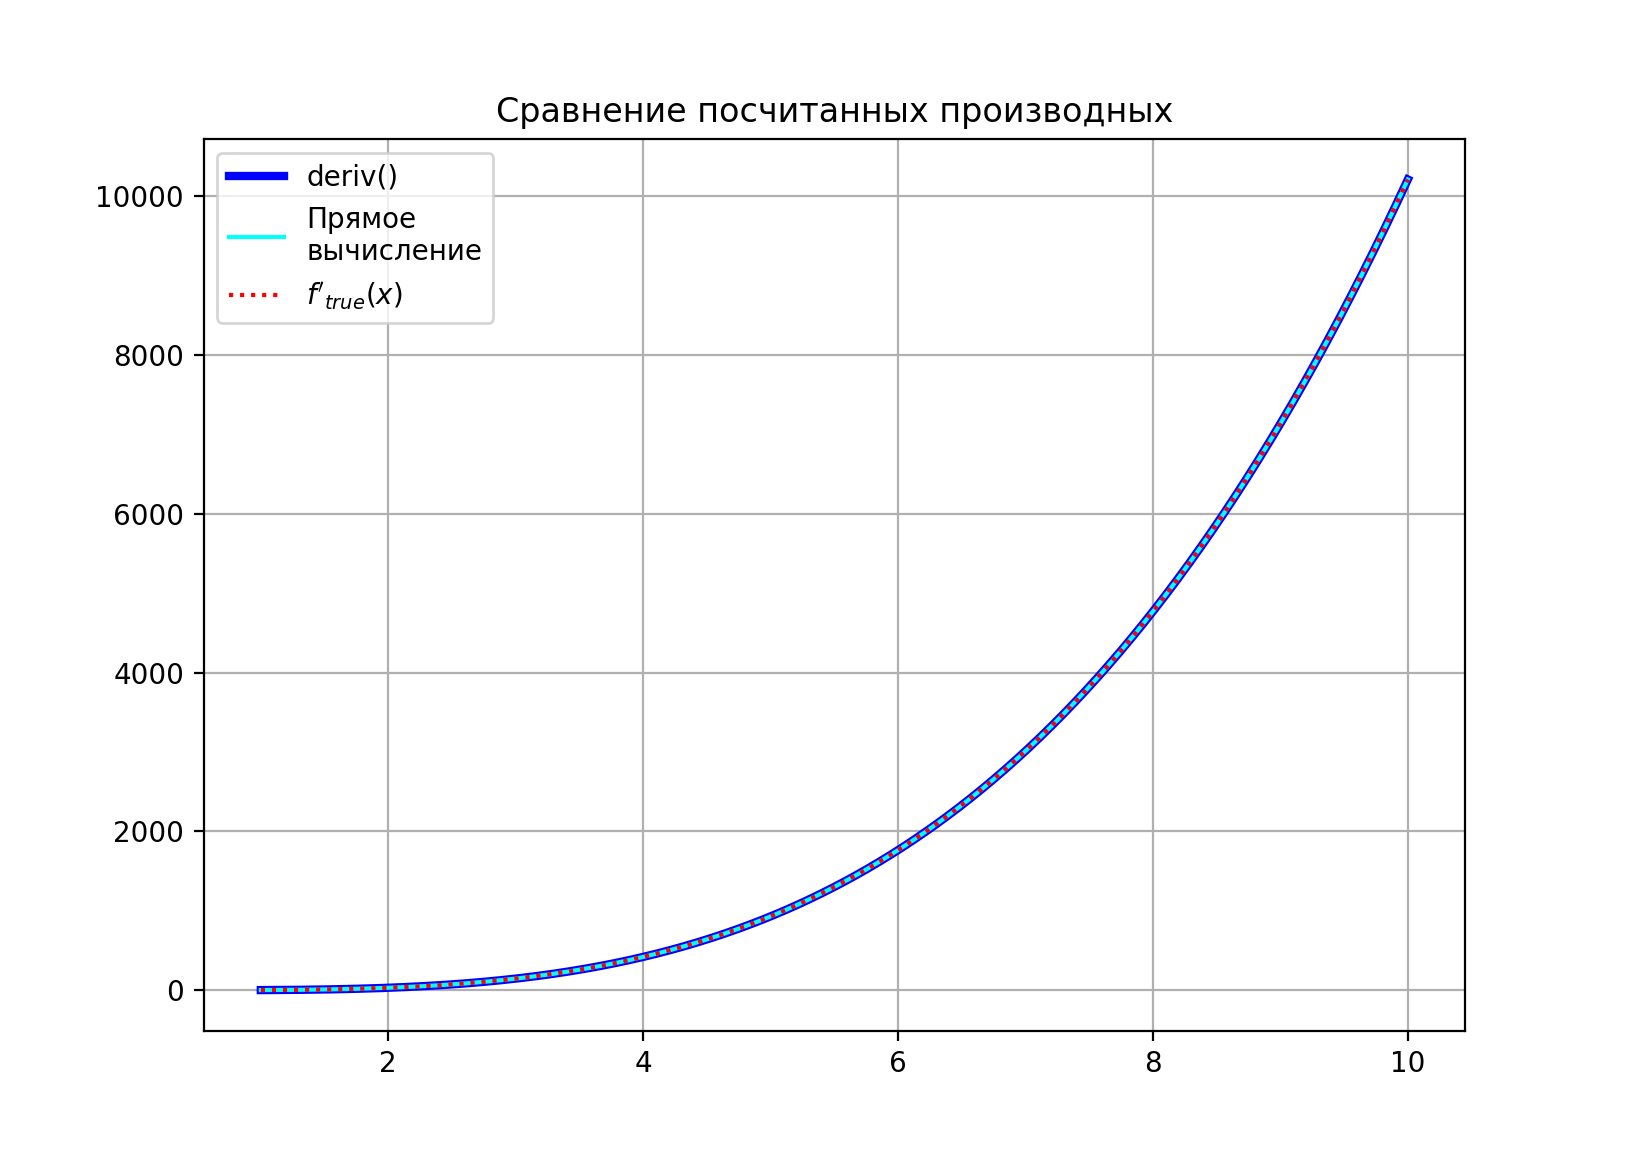

Максимальная ошибка функции deriv равна 1.8189894035458565e-12
Максимальная ошибка прямого вычисления производной равна 1.8189894035458565e-12


In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


f = lambda x: x**4 * log(x)
fder = lambda x: x**3 * (1 + 4 * log(x))
x = list(np.linspace(1, 10, 500))
y1 = []
y2 = []
delta1 = []
delta2 = []
ytrue = []
for i in x:
    y1.append(deriv(f, i))
    y2.append(float((f(i + eps) - f(i)) / eps))
    ytrue.append(fder(i))
    delta1.append(abs(deriv(f, i) - fder(i)))
    delta2.append(abs(float((f(i + eps) - f(i)) / eps) - fder(i)))
plt.figure()
plt.plot(x, y1, 'b-', lw=3, label='deriv()')
plt.plot(x, y2, '-', color='cyan', label='Прямое\nвычисление')
plt.plot(x, ytrue, 'r:', label="$f'_{true}(x)$")
plt.title('Сравнение посчитанных производных')
plt.legend()
plt.grid()
print('Максимальная ошибка функции deriv равна {}'.format(max(delta1)))
print('Максимальная ошибка прямого вычисления производной равна {}'.format(max(delta2)))

### Вывод формулы для возведения в степень
В выводе используется то, что $e^{x\varepsilon} = 1 + x\varepsilon$

Сначала рассмотрим случай, когда дуальное число возводится в вещественную степень:
$$
z^{x} = \big(a \cdot \mathrm{exp}(\frac{b}{a}\varepsilon)\big)^{x} = a^{x} \cdot \mathrm{exp}(\frac{bx}{a}\varepsilon) = a^{x} \cdot (1 + \frac{bx}{a}\varepsilon) = a^{x} + bxa^{x-1}\varepsilon
$$

Теперь возведение вещественного числа в дуальную степень:
$$
x^{a+b\varepsilon} = x^{a} \cdot x^{b\varepsilon} = x^{a} \cdot e^{b\ln(x)\varepsilon} = x^{a} \cdot (1 + b\ln(x)\varepsilon) = x^{a} + x^{a}b\ln(x)\varepsilon
$$

Используя последний результат, получаем правило возведения дуального числа в дуальную степень:

$$
z_1 = a + b\varepsilon = a \cdot \mathrm{exp}(\frac{b}{a}\varepsilon)   \qquad   z_2 = c + d\varepsilon = c \cdot \mathrm{exp}(\frac{d}{c}\varepsilon)
$$

$$
\Rightarrow z_1^{z_2} = a^{c + d\varepsilon} \cdot \big(\mathrm{exp}(\frac{b}{a}\varepsilon)\big)^{c + d\varepsilon} = a^{c + d\varepsilon} \cdot \mathrm{exp}\big(\frac{b}{a}\varepsilon \cdot (c + d\varepsilon)\big) = a^{c + d\varepsilon} \cdot \mathrm{exp}(\frac{bc}{a}\varepsilon)=
$$
$$
= \big(a^{c} + a^{c}d\ln(a)\varepsilon\big)\big(1+\frac{bc}{a}\varepsilon\big) 
= a^{c} + \big(a^{c}d\ln(a) + a^{c - 1}bc\big)\varepsilon
$$